<a href="https://colab.research.google.com/github/asluchych/introduction-econometrics/blob/main/chapter2_statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: The Simple Linear Regression Model                          
                                                               
# Exercise 3: House Prices

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Read data

In [24]:
houses = pd.read_csv("houseprices.csv")

Explore data

In [6]:
houses.describe().round(2)

,PRICE,SQM
count,1080.00,1080.00
mean,154863.18,216.08
std,122912.81,93.65
min,22000.00,61.50
25%,99000.00,149.06
50%,130000.00,203.13
75%,170162.50,260.13
max,1580000.00,733.65


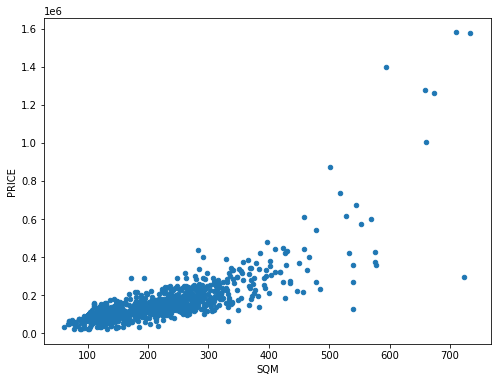

In [ ]:
houses.plot(kind = 'scatter', x = 'SQM', y = 'PRICE', figsize = (8,6))
plt.savefig('plot1.png')
plt.show()

In [7]:
houses.corr().round(5)

,PRICE,SQM
PRICE,1.00000,0.76069
SQM,0.76069,1.00000


In [9]:
houses.cov().round(3)

,PRICE,SQM
PRICE,1.510756e+10,8756554.853
SQM,8.756555e+06,8771.174


positive relationship between price and sqm

In [26]:
dep_var = houses[['PRICE']]
dep_var

,PRICE
0,66500
1,66000
2,68500
3,102000
4,54000
...,...
1075,122570
1076,185000
1077,1280000
1078,123808


In [28]:
exp_var = houses[['SQM']]
exp_var = sm.add_constant(exp_var)
exp_var

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,SQM
0,1.0,68.84
1,1.0,68.84
2,1.0,73.39
3,1.0,258.55
4,1.0,108.23
...,...,...
1075,1.0,265.05
1076,1.0,427.26
1077,1.0,658.31
1078,1.0,292.46


# a) Linear Regression with OLS

In [44]:
model = sm.OLS(dep_var, exp_var).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sun, 15 May 2022   Prob (F-statistic):          1.54e-204
Time:                        16:08:49   Log-Likelihood:                -13722.
No. Observations:                1080   AIC:                         2.745e+04
Df Residuals:                    1078   BIC:                         2.746e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.086e+04   6110.189     -9.961      0.000   -7.29e+04   -4.89e+04
SQM          998.3332     25.947     38.476      0.000     947.422    1049.245
==============================================================================
Omnibus:                     1185.144   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139601.187
Skew:                           5.135   Prob(JB):                         0.00
Kurtosis:                      57.743   Cond. No.                         592.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Add a regression line to the scatterplot

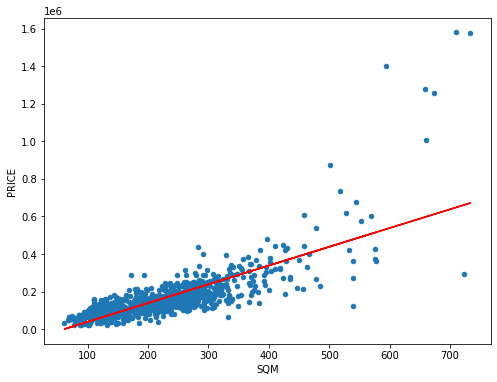

In [43]:
houses.plot(kind = 'scatter', x = 'SQM', y = 'PRICE', figsize = (8,6))
m, b = np.polyfit(houses['SQM'], houses['PRICE'], 1)
plt.plot(houses['SQM'], m*houses['SQM']+b, color='red')
plt.show()

# c) Predict the price for the house of size 200m^2 

In [48]:
model.predict([1, 200])

array([138805.0790688])

# d) Scaling

In [51]:
dep_var2 = houses[['PRICE']]/1000
dep_var2

,PRICE
0,66.500
1,66.000
2,68.500
3,102.000
4,54.000
...,...
1075,122.570
1076,185.000
1077,1280.000
1078,123.808


Linear regression with scaled price

In [54]:
model_rescaled = sm.OLS(dep_var2, exp_var).fit()
model_rescaled.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sun, 15 May 2022   Prob (F-statistic):          1.54e-204
Time:                        16:50:01   Log-Likelihood:                -6261.6
No. Observations:                1080   AIC:                         1.253e+04
Df Residuals:                    1078   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.8616      6.110     -9.961      0.000     -72.851     -48.872
SQM            0.9983      0.026     38.476      0.000       0.947       1.049
==============================================================================
Omnibus:                     1185.144   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139601.187
Skew:                           5.135   Prob(JB):                         0.00
Kurtosis:                      57.743   Cond. No.                         592.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prediction

In [56]:
model_rescaled.predict([1, 200])

array([138.80507907])

The prediction is still in 1000 USD. For interpretation, calculate in USD * 1000:

In [57]:
model_rescaled.predict([1, 200]) * 1000

array([138805.0790688])

# Assignment 5: Estimation Uncertainty